$\chi^2$

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

import numpy as np
import itertools
import os
import pandas as pd

In [3]:
def chisq(obs, exp, error):
    return np.sum((obs - exp) ** 2 / (error ** 2))


In [4]:
# obs:

#LF
L_meas_konno16 = [5.6372e+41,7.0968e+41,8.9344e+41,1.1248e+42,1.4160e+42,1.7826e+42,2.2442e+42,2.8253e+42,3.5568e+42,4.4778e+42,5.6372e+42,7.0968e+42,8.8907e+42,1.1248e+43,1.4091e+43,1.7739e+43,2.2332e+43,2.8115e+43,3.5395e+43,4.4559e+43,5.6097e+43,7.0621e+43,8.8907e+43,1.1193e+44,1.4091e+44,1.7739e+44,2.2332e+44]
Phi_meas_konno16 = [0.0089869,0.0077939,0.0062203,0.0049059,0.0034362,0.0024941,0.0018537,0.0011531,0.00077939,0.00063698,0.00041549,0.00026466,0.00013615,0.000083691,0.00011260,0.000060744,0.000052680,0.000022681,0.000045687,0.000037785,0.0000075212,0.000030157,0.0000075212,0.000022681,0.000014971,0.0000074325,0.0000075212]
err_konno16 = [0.0021379,0.0018544,0.00148,0.0011153,0.0007812,0.0005935,0.000466,0.000302,0.00022277,0.00019502,0.00014872,0.00011139,0.00007862,0.000060152,0.000070606,0.000052249,0.000049544,0.000034908,0.000046347,0.000042576,0.0000236731,0.000039076,0.0000239701,0.000035029,0.00002992,0.0000236731,0.0000236731]


#CF
r_meas_khostovan = [1.5001173865680846,2.3753841550095163,3.761338902136766,5.982848746241583,9.51641956540266,15.068922239342394,23.968880463189763,37.95389572534231,60.37010313703765,95.16419565402671,151.36976578535385,239.68880463189825,379.5389572534245,603.7010313703769,968.9500062613703,1527.4008686968152]
CF_meas_khostovan = [0.948717948717948,0.405128205128205,0.5658119658119656,-0.008547008547008073,-0.295726495726496,-0.3367521367521369,-0.40170940170940206,-0.654700854700855,-0.6239316239316244,-0.6888888888888891,-0.7059829059829061,-0.7538461538461547,-0.890598290598291,-1.218803418803419,-1.8478632478632475,-2.165811965811966]
err_khostovan = [0.29059829059,0.42393162393,0.21196581196,0.33504273504,0.37264957265,0.21538461538,0.18461538461,0.18803418803,0.12991452991,0.12307692307,0.12649572649,0.11965811965,0.11965811965,0.11623931623,0.13675213675,0.17094017094]
err_khostovan2 = [12.727314331499155,5.765697404143252,3.682231625362359,1.6566216409183583,1.0468083026298245,0.49992776710216436,0.34326742803015176,0.19438581014345055,0.13871583693670783,0.11264719527497469,0.11036435645340062,0.09408036542391465,0.06866680789241356,0.036550888015866936,0.008672102076149829,0.005837281098669995]


In [5]:
M_Sun = 1.9891e30
m_H = 1.67e-27  # in kg

beta_values = (1.1e-4) / (4 * np.pi * m_H)
print(beta_values)

5.24162986230793e+21


**Luminosity Function**

In [19]:
%%time

# List of file names with different alpha and beta values
dir = '/Volumes/Hasti-2T-2/main/SMDPL/scaling_relations_0.258000/'

# Define the range of values for alpha and betaa
alpha_values = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100,
                        105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180,
                        185, 190, 195, 200])
betaa_values = np.array([0.6e-4, 0.7e-4, 0.8e-4, 0.9e-4, 1e-4,
                        1.1e-4, 1.2e-4, 1.3e-4, 1.4e-4, 1.5e-4, 1.6e-4, 1.7e-4, 1.8e-4, 1.9e-4, 2e-4,
                        2.1e-4, 2.2e-4, 2.3e-4, 2.4e-4, 2.5e-4, 2.6e-4, 2.7e-4, 2.8e-4, 2.9e-4, 3e-4,
                        3.1e-4, 3.2e-4, 3.3e-4, 3.4e-4, 3.5e-4, 3.6e-4, 3.7e-4, 3.8e-4, 3.9e-4, 4e-4,
                        4.1e-4, 4.2e-4, 4.3e-4, 4.4e-4, 4.5e-4, 4.6e-4, 4.7e-4, 4.8e-4, 4.9e-4, 5e-4])

M_Sun = 1.9891e30
m_H = 1.67e-27 # in kg
beta_values = (betaa_values)/(4*np.pi*m_H)

# Use itertools.product to generate all combinations
combinations = list(itertools.product(alpha_values, beta_values))

file_names_LF = []
# Loop over all combinations
for alpha, beta in combinations:
    file_name = f'LF_IGM_alpha_{alpha}_beta_{beta}_a=0.258000_z=2.88.txt'
    full_path = os.path.join(dir, file_name)
    file_names_LF.append(full_path)
    #print(f"Calculating for alpha = {alpha}, beta = {beta}")


CPU times: user 10.3 ms, sys: 194 µs, total: 10.5 ms
Wall time: 10.4 ms


In [20]:
# Initialize lists to store alpha, beta, and total chi-squared values
alphas = []
betas = []
total_chi_squared_values_LF_IGM = []

for file_name in file_names_LF:
    # Extract alpha and beta values from the filename
    alpha_start = file_name.find("alpha_") + len("alpha_")
    alpha_end = file_name.find("_beta")
    beta_start = file_name.find("beta_") + len("beta_")
    beta_end = file_name.find("_a=")
    
    alpha = float(file_name[alpha_start:alpha_end])
    beta = float(file_name[beta_start:beta_end])
    alphas.append(alpha)
    betas.append(beta)
    
    # Load LF data from the current file
    LF = np.loadtxt(file_name)
    LF_y = [LF[14, 1], LF[16, 1], LF[18, 1], LF[20, 1], LF[22, 1], LF[24, 1], LF[26, 1], LF[28, 1], LF[30, 1], LF[32, 1], LF[34, 1], LF[36, 1], LF[38, 1], LF[40, 1], LF[42, 1], LF[44, 1], LF[46, 1], LF[48, 1], LF[50, 1], LF[52, 1], LF[54, 1], LF[56, 1], LF[58, 1], LF[60, 1], LF[62, 1], LF[64, 1], LF[66, 1]]
    chi_square_LF_IGM = chisq(np.array(Phi_meas_konno16[0:17]), np.array(LF_y[0:17]), np.array(err_konno16[0:17]))
    total_chi_squared_values_LF_IGM.append(chi_square_LF_IGM)


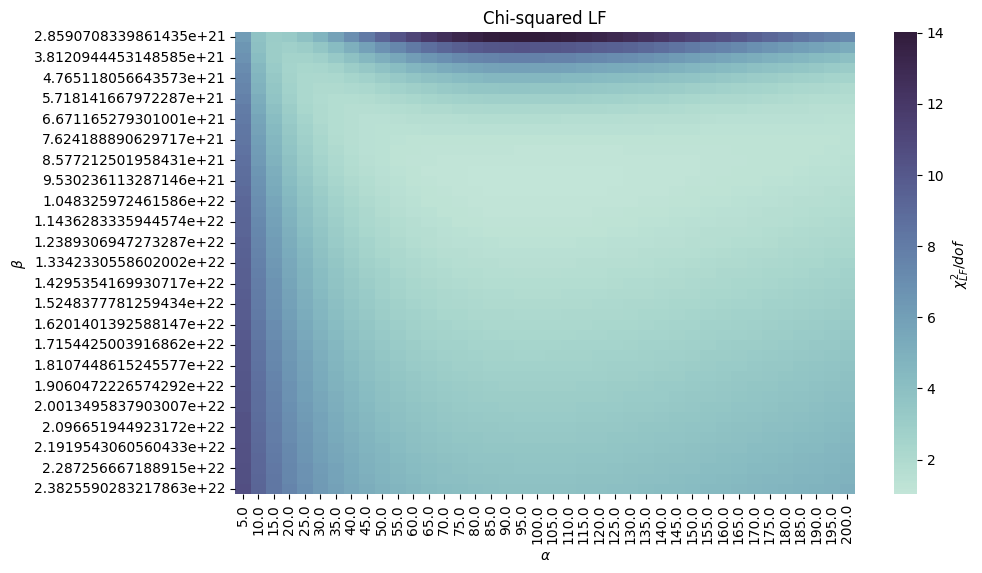

1.02903232119318
CPU times: user 593 ms, sys: 13.5 ms, total: 607 ms
Wall time: 225 ms


In [22]:
%%time

N_lf = 17
parameters = 2
dof_lf = N_lf  - parameters

vals_lf = np.array(total_chi_squared_values_LF_IGM)/dof_lf


# Your DataFrame
df = pd.DataFrame({r'$\rm{log}\, \alpha$': alphas, r'$\beta$': betas, 'value': vals_lf})

# Remove duplicates
df = df.drop_duplicates(subset=[r'$\rm{log}\, \alpha$', r'$\beta$'])

# Pivot the DataFrame
df_wide = df.pivot(index=r'$\beta$', columns=r'$\rm{log}\, \alpha$', values='value')

# Create a custom annotation DataFrame with formatted values
annot_df = df_wide.applymap(lambda x: f'{x:.2f}')
#annot_df = annot_df.style.set_properties(**{'font-size': '8pt'})

# Create the heatmap with custom annotations
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
heatmap = sb.heatmap(df_wide, annot=False, fmt="", cmap=sb.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), mask=None, cbar_kws={'label': r'$\chi^2_{LF}/dof$'})

# Customize the font size for the annotations
for text in heatmap.texts:
    text.set_fontsize(6)  # Adjust the font size as needed


# Customize the plot (labels, title, etc.)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.title('Chi-squared LF')

# Show the heatmap
plt.show()
print(np.min(vals_lf))

In [23]:
# Find the index of the minimum value in total_chi_squared_values_LF_IGM
min_index = np.argmin(total_chi_squared_values_LF_IGM)

# Use the index to get the corresponding alpha and beta values
min_alpha = alphas[min_index]
min_beta = betas[min_index]
# Print the results
print(f"Minimum value of total_chi_squared_values_LF_IGM: {np.min(total_chi_squared_values_LF_IGM)}")
print(f"Corresponding alpha value: {min_alpha}")
print(f"Corresponding beta value: {min_beta}")

Minimum value of total_chi_squared_values_LF_IGM: 15.435484817897699
Corresponding alpha value: 100.0
Corresponding beta value: 9.530236113287146e+21


$w(\theta)$

In [24]:
%%time

# List of file names with different alpha and beta values
dir = '/Volumes/Hasti-2T-2/main/SMDPL/scaling_relations_0.258000/'

# Define the range of values for alpha and betaa
alpha_values = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100,
                        105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180,
                        185, 190, 195, 200])
betaa_values = np.array([0.6e-4, 0.7e-4, 0.8e-4, 0.9e-4, 1e-4,
                        1.1e-4, 1.2e-4, 1.3e-4, 1.4e-4, 1.5e-4, 1.6e-4, 1.7e-4, 1.8e-4, 1.9e-4, 2e-4,
                        2.1e-4, 2.2e-4, 2.3e-4, 2.4e-4, 2.5e-4, 2.6e-4, 2.7e-4, 2.8e-4, 2.9e-4, 3e-4,
                        3.1e-4, 3.2e-4, 3.3e-4, 3.4e-4, 3.5e-4, 3.6e-4, 3.7e-4, 3.8e-4, 3.9e-4, 4e-4,
                        4.1e-4, 4.2e-4, 4.3e-4, 4.4e-4, 4.5e-4, 4.6e-4, 4.7e-4, 4.8e-4, 4.9e-4, 5e-4])


M_Sun = 1.9891e30
m_H = 1.67e-27 # in kg
beta_values = (betaa_values)/(4*np.pi*m_H)

# Use itertools.product to generate all combinations
combinations = list(itertools.product(alpha_values, beta_values))

file_names_CF = []
# Loop over all combinations
for alpha, beta in combinations:
    file_name = f'halotools_w_theta_Landy-Szalay_IGM_alpha_{alpha}_beta_{beta}_a=0.258000_z=2.88.txt'
    full_path = os.path.join(dir, file_name)
    file_names_CF.append(full_path)
    #print(f"Calculating for alpha = {alpha}, beta = {beta}")
    

CPU times: user 8.92 ms, sys: 1.19 ms, total: 10.1 ms
Wall time: 9.02 ms


In [26]:
# Initialize lists to store alpha, beta, and total chi-squared values
alphas = []
betas = []
total_chi_squared_values_CF_IGM = []

for file_name in file_names_CF:
    # Extract alpha and beta values from the filename
    alpha_start = file_name.find("alpha_") + len("alpha_")
    alpha_end = file_name.find("_beta")
    beta_start = file_name.find("beta_") + len("beta_")
    beta_end = file_name.find("_a=")
    
    alpha = float(file_name[alpha_start:alpha_end])
    beta = float(file_name[beta_start:beta_end])
    alphas.append(alpha)
    betas.append(beta)
    
    # Load LF data from the current file
    CF = np.loadtxt(file_name)
    chi_square_CF_IGM = chisq(np.array(CF_meas_khostovan), np.array(CF[:,1]), 10**np.array(err_khostovan2))
    total_chi_squared_values_CF_IGM.append(chi_square_CF_IGM)


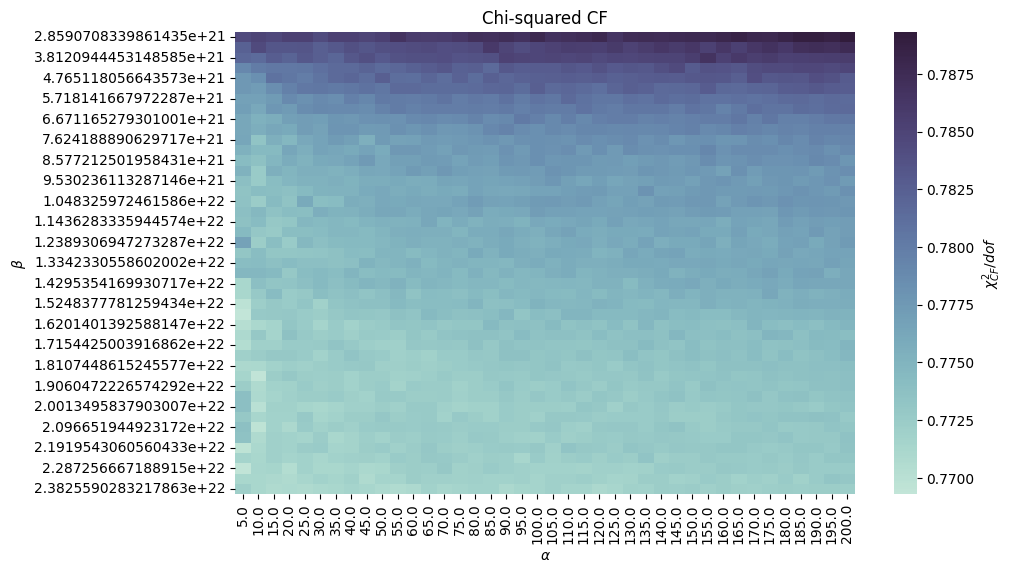

0.7692991231609914
CPU times: user 597 ms, sys: 14.2 ms, total: 611 ms
Wall time: 227 ms


In [27]:
%%time

N_cf = 17
parameters = 2
dof_cf = N_cf  - parameters

vals_cf = np.array(total_chi_squared_values_CF_IGM)/dof_cf


# Your DataFrame
df = pd.DataFrame({r'$\rm{log}\, \alpha$': alphas, r'$\beta$': betas, 'value': vals_cf})

# Remove duplicates
df = df.drop_duplicates(subset=[r'$\rm{log}\, \alpha$', r'$\beta$'])

# Pivot the DataFrame
df_wide = df.pivot(index=r'$\beta$', columns=r'$\rm{log}\, \alpha$', values='value')

# Create a custom annotation DataFrame with formatted values
annot_df = df_wide.applymap(lambda x: f'{x:.2f}')

# Create the heatmap with custom annotations
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
heatmap = sb.heatmap(df_wide, annot=False, fmt="", cmap=sb.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), mask=None, cbar_kws={'label': r'$\chi^2_{CF}/dof$'})

# Customize the font size for the annotations
for text in heatmap.texts:
    text.set_fontsize(6)  # Adjust the font size as needed


# Customize the plot (labels, title, etc.)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.title('Chi-squared CF')

# Show the heatmap
plt.show()
print(np.min(vals_cf))

In [28]:
# Find the index of the minimum value in total_chi_squared_values_LF_IGM
min_index = np.argmin(total_chi_squared_values_CF_IGM)

# Use the index to get the corresponding alpha and beta values
min_alpha = alphas[min_index]
min_beta = betas[min_index]
# Print the results
print(f"Minimum value of total_chi_squared_values_CF_IGM: {np.min(total_chi_squared_values_CF_IGM)}")
print(f"Corresponding alpha value: {min_alpha}")
print(f"Corresponding beta value: {min_beta}")

Minimum value of total_chi_squared_values_CF_IGM: 11.53948684741487
Corresponding alpha value: 5.0
Corresponding beta value: 1.572488958692379e+22


**Total $\chi^2$**

In [29]:
total_chi_squared_values_IGM = np.array(total_chi_squared_values_LF_IGM) + np.array(total_chi_squared_values_CF_IGM)

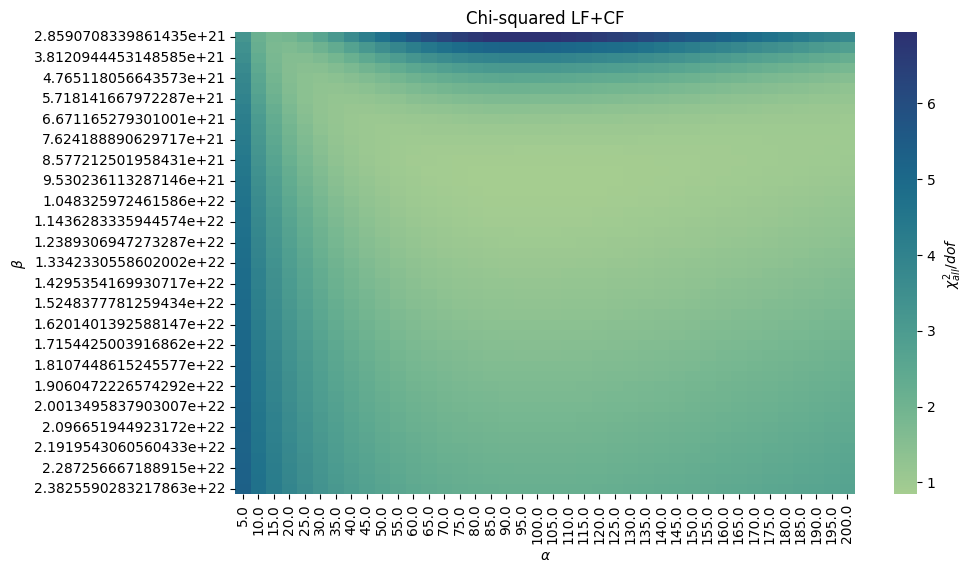

0.8466467720020519
Minimum value: 0.8466467720020519
Corresponding alpha: 100.0
Corresponding beta: 9.530236113287146e+21
CPU times: user 598 ms, sys: 11.8 ms, total: 610 ms
Wall time: 227 ms


In [31]:
%%time



N_lf = 17
N_cf = 17
parameters = 2
N_all = N_lf + N_cf 

dof_all = N_all - parameters


vals_all = np.array(total_chi_squared_values_IGM)/dof_all


# Your DataFrame
df = pd.DataFrame({r'$\rm{log}\, \alpha$': alphas, r'$\beta$': betas, 'value': vals_all})

# Remove duplicates
df = df.drop_duplicates(subset=[r'$\rm{log}\, \alpha$', r'$\beta$'])

# Pivot the DataFrame
df_wide = df.pivot(index=r'$\beta$', columns=r'$\rm{log}\, \alpha$', values='value')

# Create a custom annotation DataFrame with formatted values
annot_df = df_wide.applymap(lambda x: f'{x:.3f}')

# Create the heatmap with custom annotations
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
heatmap = sb.heatmap(df_wide, annot=False, fmt="", cmap=sb.color_palette("crest", as_cmap=True), mask=None, cbar_kws={'label': r'$\chi^2_{all}/dof$'})

# Customize the font size for the annotations
for text in heatmap.texts:
    text.set_fontsize(6)  # Adjust the font size as needed


# Customize the plot (labels, title, etc.)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.title('Chi-squared LF+CF')

# Show the heatmap
plt.show()
print(np.min(vals_all))



# Find the indices of the minimum value in the DataFrame
min_idx = df_wide.unstack().idxmin()

# Extract the corresponding values of alpha and beta
min_alpha = min_idx[0]
min_beta = min_idx[1]

# Print the values
print(f"Minimum value: {np.min(vals_all)}")
print(f"Corresponding alpha: {min_alpha}")
print(f"Corresponding beta: {min_beta}")